In [69]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats
import os
from datetime import datetime

import obspy
from obspy import UTCDateTime
from obspy import read
from obspy.clients.fdsn import Client

import seaborn as sns
import matplotlib.ticker as mticker
#import cartopy

from eqcorrscan.utils.mag_calc import calc_b_value
from eqcorrscan.utils.mag_calc import calc_max_curv

time = datetime.now()
print("Imported! " + str(time))

Imported! 2021-04-16 10:13:05.806084


calc_b_value

Not computing completeness above 5.4, fewer than 4 events


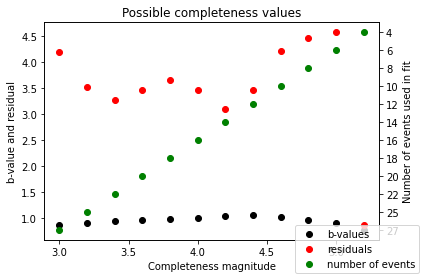

In [70]:
# EXAMPLE

client = Client('IRIS')
t1 = UTCDateTime('2012-03-26T00:00:00')
t2 = t1 + (3 * 86400)
catalog = client.get_events(starttime = t1, endtime = t2, minmagnitude = 3)
magnitudes_EX1 = [events.magnitudes[0].mag for events in catalog]
b_values = calc_b_value(magnitudes_EX1, completeness = np.arange(3,7,0.2), plotvar = True)
#magnitudes

In [71]:
QTM_Range = pd.read_pickle("QTM_Range.pkl")
QTM_Range.columns

Index(['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'SECOND', 'EVENTID',
       'LATITUDE', 'LONGITUDE', 'DEPTH', 'MAGNITUDE', 'MAGP5', 'MAGP95',
       'TEMPLATEID', 'STACKCC', 'MAD', 'RELOCATED?', 'POSIX TIME', 'TIMESTAMP',
       'VECTORIZATION', 'VTIMESTAMP', 'RELATIVE DAY', 'RELATIVE HOUR'],
      dtype='object')

In [72]:
Magnitudes = QTM_Range.MAGNITUDE
print(len(Magnitudes))
print(len(QTM_Range))

138415
138415


In [98]:
b_values = calc_b_value(magnitudes = Magnitudes, 
                        completeness = np.arange(-2, 2, 0.2), 
                        plotvar = False)
b_values

[(-2.0, 0.60159404948594475, 87.879564725106306, '646'),
 (-1.8, 0.6152744582324543, 88.789371279414411, '633'),
 (-1.6000000000000001, 0.63468297226718529, 90.095750769221809, '614'),
 (-1.4000000000000001, 0.6551126228072166, 91.468048604558078, '594'),
 (-1.2000000000000002, 0.67528383381601698, 92.812687686536506, '574'),
 (-1.0000000000000002, 0.69488242436898051, 94.084326099325565, '554'),
 (-0.80000000000000027, 0.71358315723970556, 95.139119454029654, '534'),
 (-0.60000000000000031, 0.73115102166703549, 95.913024854019397, '514'),
 (-0.40000000000000036, 0.74753383998042577, 96.341671561976355, '494'),
 (-0.2000000000000004, 0.76291079106450643, 96.375847648608627, '474'),
 (-4.4408920985006262e-16, 0.77761534427561696, 96.298821736529462, '454'),
 (0.19999999999999929, 0.79213876620011148, 96.405390655284776, '434'),
 (0.39999999999999947, 0.80674939285620506, 96.518103772651671, '414'),
 (0.59999999999999964, 0.82171324864011586, 96.645868084164221, '394'),
 (0.7999999999999

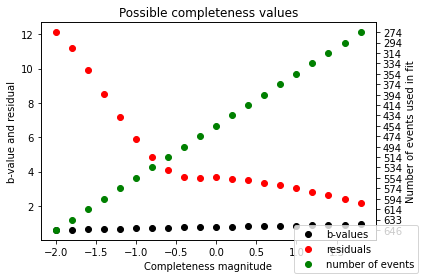

<Figure size 432x288 with 0 Axes>

In [96]:
# arguments required are magnitudes, completeness

b_values = calc_b_value(magnitudes = Magnitudes, 
                        completeness = np.arange(-2, 2, 0.2),
                        plotvar = True)
# b_values: list of tuples of (completeness, b-value, residual, number of magnitudes used)
plt.savefig("EQcorrscan/b-val_1.png");

calc_max_curv

In [75]:
# EXAMPLE

mags = np.arange(3, 6, 0.1)
N = 10 ** (5 - 1 * mags)

magnitudes_EX2 = [0,2,3,2.5,2.2,1.0]
for mag, n in zip(mags, N):
    magnitudes_EX2.extend([mag for _ in range(int(n))])

calc_max_curv(magnitudes_EX2, plotvar = False)

3.0

In [88]:
#print(len(Magnitudes))
#plt.figure(figsize = (1,1)); # disregarded
calc_max_curv(Magnitudes, plotvar = False)
#plt.savefig("EQcorrscan/MC_1.png", facecolor = "white");

-0.5

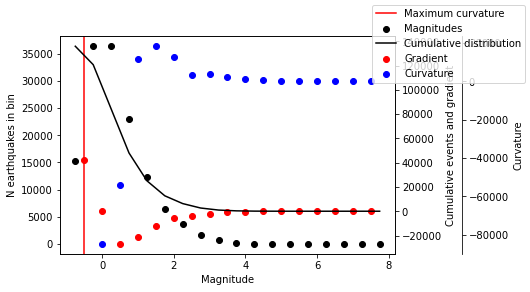

In [89]:
#print(len(Magnitudes))
#plt.figure(figsize = (1,1)); # disregarded
calc_max_curv(Magnitudes, plotvar = True)
plt.savefig("EQcorrscan/MC_1.png", facecolor = "white");